In [1]:
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')

In [3]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [4]:
image.shape

(1024, 1360)

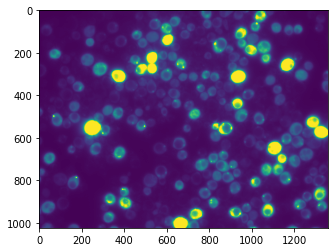

In [5]:
plt.imshow(image);

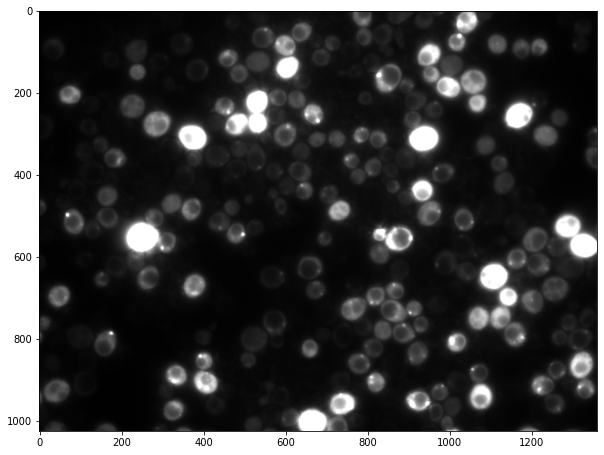

In [6]:
plt.subplots(figsize = (10,10))
plt.imshow(image, cmap = 'gray');

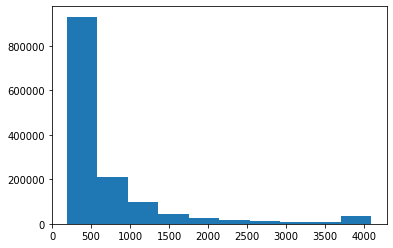

In [7]:
plt.hist(np.ravel(image))
plt.show()

In [8]:
cropped = image[700:800,800:900]

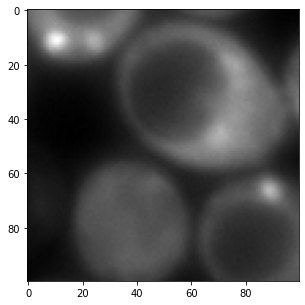

In [9]:
plt.subplots(figsize = (5,5))
plt.imshow(cropped, cmap = 'gray');

In [10]:
cropped = image[700:800:3,800:900:3]

In [11]:
cropped.shape

(34, 34)

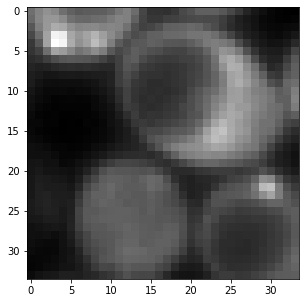

In [12]:
plt.subplots(figsize = (5,5))
plt.imshow(cropped, cmap = 'gray');

In [13]:
image_rgb = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')

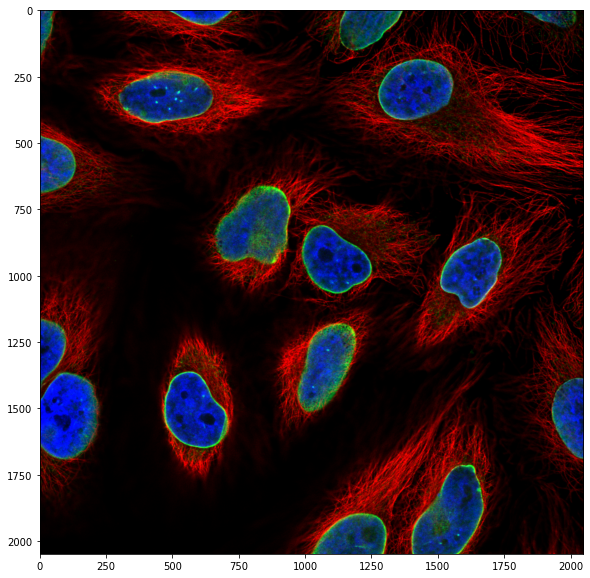

In [14]:
plt.subplots(figsize = (10,10))
plt.imshow(image_rgb);

In [15]:
image_rgb.shape

(2048, 2048, 3)

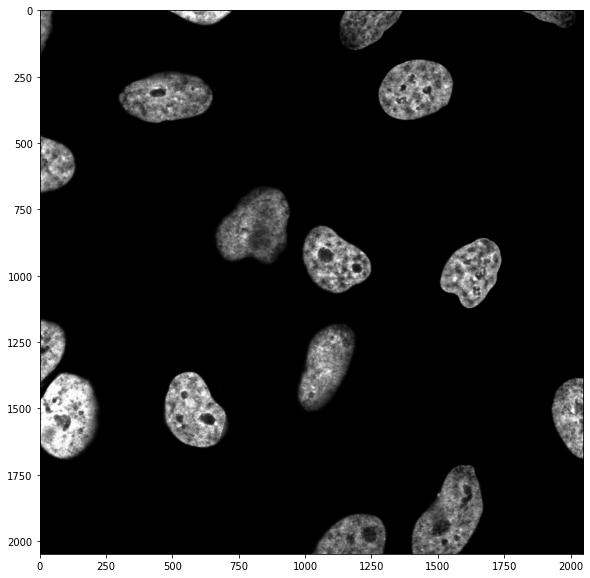

In [16]:
blue_image = image_rgb[:,:,2]
plt.subplots(figsize = (10,10))
plt.imshow(blue_image, cmap = 'gray');

In [17]:
mymask = blue_image > 50

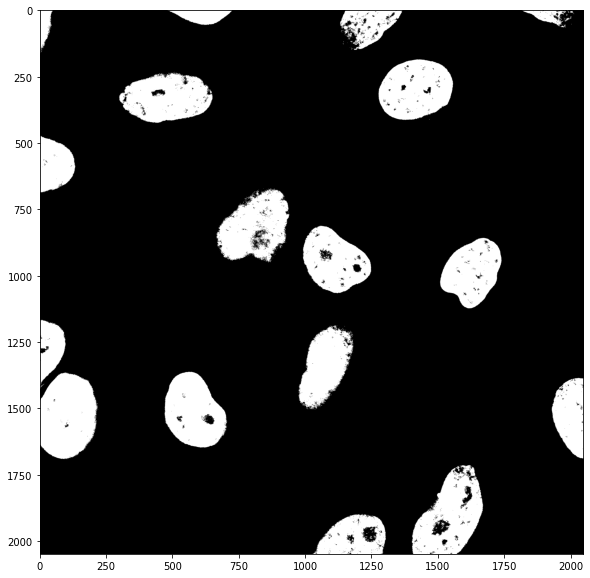

In [18]:
plt.subplots(figsize = (10,10))
plt.imshow(mymask, cmap = 'gray');

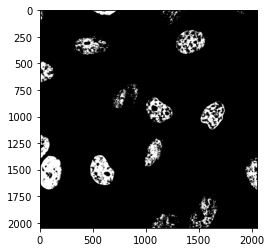

In [19]:
mask = blue_image > 120
plt.imshow(mask, cmap = 'gray');

In [20]:
import skimage.filters
help(skimage.filters.threshold_otsu)

Help on function threshold_otsu in module skimage.filters.thresholding:

threshold_otsu(image, nbins=256)
    Return threshold value based on Otsu's method.
    
    Parameters
    ----------
    image : (N, M) ndarray
        Grayscale input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    
    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.
    
    Raises
    ------
    ValueError
         If ``image`` only contains a single grayscale value.
    
    References
    ----------
    .. [1] Wikipedia, https://en.wikipedia.org/wiki/Otsu's_Method
    
    Examples
    --------
    >>> from skimage.data import camera
    >>> image = camera()
    >>> thresh = threshold_otsu(image)
    >>> binary = image <= thresh
    
    Notes
    -----
    The input image must be grayscale.



In [21]:
my_otsu_threshold = skimage.filters.threshold_otsu(blue_image)
print(my_otsu_threshold)

66


In [22]:
mask_nuclei = blue_image > my_otsu_threshold

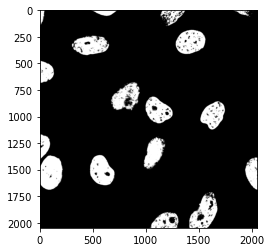

In [23]:
plt.imshow(mask_nuclei, cmap = 'gray');

In [24]:
red_image = image_rgb[:,:,0]

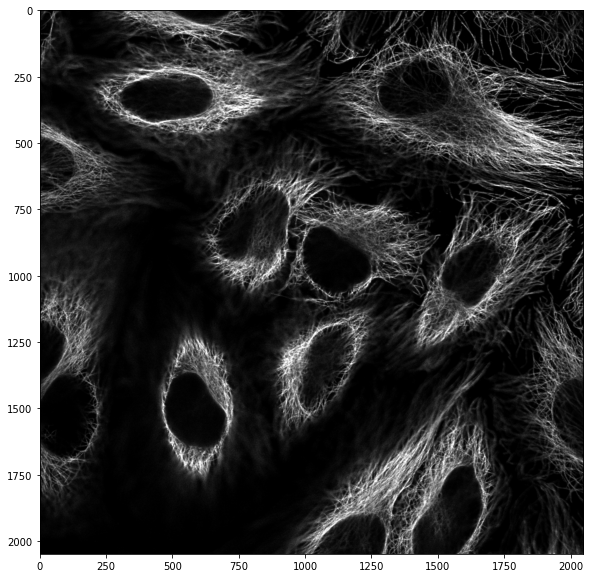

In [26]:
plt.subplots(figsize=(10,10))
plt.imshow(red_image, cmap = 'gray');

In [28]:
mask_cells = red_image > skimage.filters.threshold_otsu(red_image)

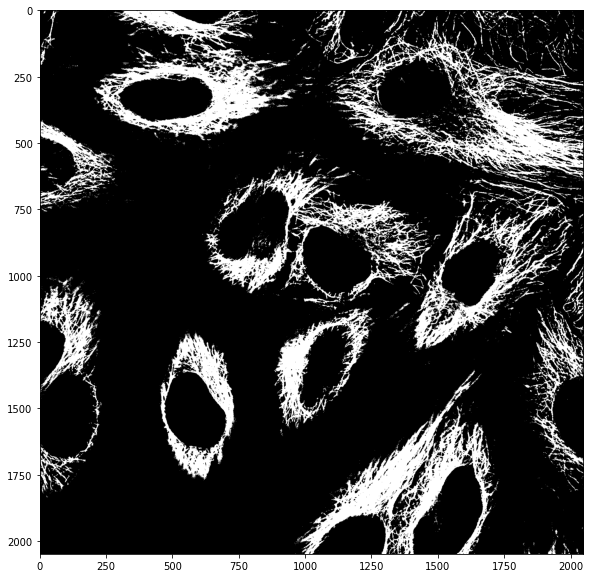

In [30]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells, cmap = 'gray');

In [31]:
both_masks = mask_cells * mask_nuclei

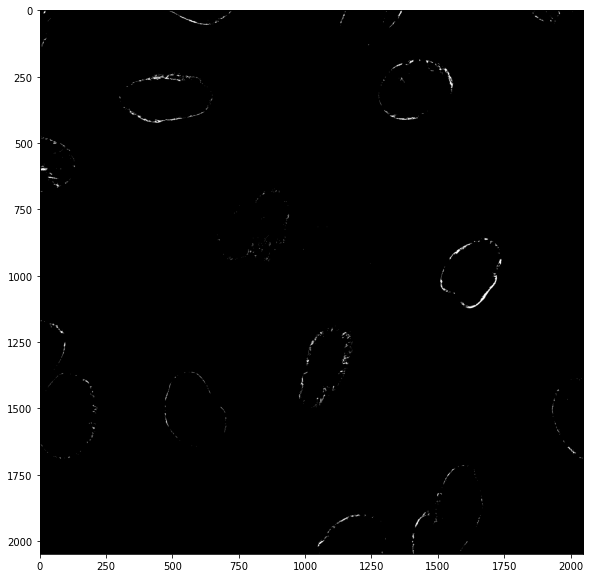

In [32]:
plt.subplots(figsize=(10,10))
plt.imshow(both_masks, cmap = 'gray');

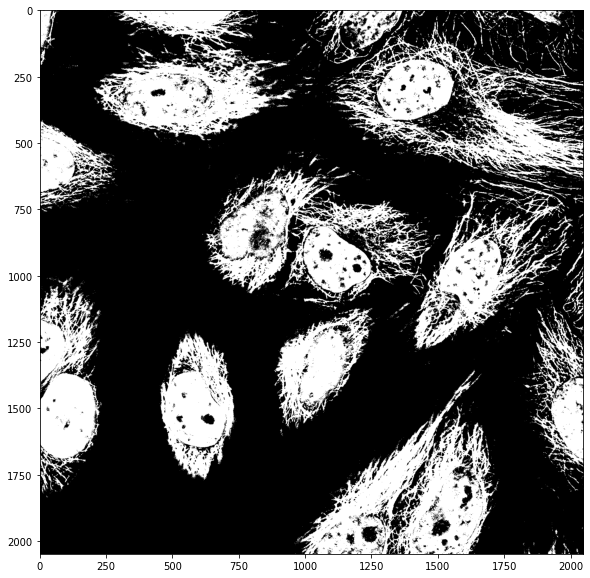

In [33]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells + mask_nuclei, cmap = 'gray');